<a href="https://colab.research.google.com/github/dobrotvorn/DataCon23/blob/main/HacatonNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Описание задания


Задание заключается в том, чтобы ...

### Описание данных
data.csv

Для всех образцов в датасете использовались наночастицы серебра Ag

---



*   Bacteria: бактериальная клетка-мишень
* NP_Synthesis: тип синтеза наночастиц
*drug: название лекарства
*drug class: класс лекарства
*Drug dose: доза препарата
*NP_concentration: концентрация НЧ
*NP_size: размер НЧ
*shape: форма НЧ
*method: метод определения антимикробной активности
*ZOI_drug, ZOI_NP, ZOI_drug_NP: зона ингибирования препарата, НЧ и их комбинации
*Fold increase in antibacterial activity (%): кратное увеличение *антибактериальной активности (%)
*дзета-потенциал;
*MDR: множественная лекарственная устойчивость резистентен ли обычный препарат к целевому патогену

---

bacterial_descriptors.csv


* Tax_id: id бактерии в базе данных NCBI
*Bacteria: название бактерии
*ingdom: царство бактерии
*subkingdom: подцарство бактерии
*clade: характеристика бактерии с точки зрения родственных взаимоотношений между таксономическими группами
*phylum: филум бактерии
*class: класс бактерии
*order: порядок бактерии
*family: семейство бактерии
*genus: род бактерии
*species: вид бактерии
*gram: результат реакции окрашивания по Грамму для бактерии
*min_Incub_period, avg_Incub_period, max_Incub_period h: характеристики инкубационного периода бактерии
*growth_temp, C: температура роста бактерии
*biosafety_level: уровень опасности бактерии
*isolated_from: источник


---

drug_descriptors.csv
*  drug: название лекарства
*chemID: id лекарства в базе данных CHEMBL
*prefered_name: название лекарства
*smiles: химическая формула лекарства

## Загрузка данных и библиотек

###Импортируем и скачиваем библиотеки

In [1]:
!pip install gdown -- quiet
!pip install pymatgen
!pip install rdkit
!pip install fancyimpute --quiet
!pip install shap
import pandas as pd
import numpy as np
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import plotly

from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin




import pandas as pd
import numpy as np
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import plotly
import scipy.stats as stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import KNNImputer
from IPython.display import display, HTML
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from fancyimpute import KNN
import pymatgen.core as mg
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import SimilarityMaps
from zipfile import ZipFile



from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import KNNImputer
from IPython.display import display, HTML
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from fancyimpute import KNN
from re import A
import json
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

ERROR: Could not find a version that satisfies the requirement quiet (from versions: none)
ERROR: No matching distribution found for quiet
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 54.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.3/515.3 kB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.3/154.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:

# тут захардкодим статичные переменные
global ordinal_encoder
global text_columns
global path2firstDb
global path2secondDb
global numerics
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
path2data = '/content/data.csv' if 'google.colab' in sys.modules else 'data.csv'
path2bac_descr = '/content/bacterial_descriptors.csv' if 'google.colab' in sys.modules else 'bacterial_descriptors.csv'
path2drug_descr = '/content/drug_descriptors.csv' if 'google.colab' in sys.modules else 'drug_descriptors.csv'

### Скачиваем данные

In [3]:
url1 = 'https://raw.githubusercontent.com/dataconHack/hackathon/main/data.csv'
url2 = 'https://raw.githubusercontent.com/dataconHack/hackathon/main/bacterial_descriptors.csv'
url3 = 'https://raw.githubusercontent.com/dataconHack/hackathon/main/drug_descriptors.csv'
output1 = 'data.csv'
output2 = 'bacterial_descriptors.csv'
output3 = 'drug_descriptors.csv'
gdown.download(url1, output1, quiet=True)
gdown.download(url2, output2, quiet=True)
gdown.download(url3, output3, quiet=True)

'drug_descriptors.csv'

## Обработка данных

In [4]:
fdb = pd.read_csv(path2data)
fdb.head(3)

,Unnamed: 0.1,Unnamed: 0,Bacteria,NP_Synthesis,Drug,Drug_class_drug_bank,Drug_dose,NP_concentration,NP size_min,NP size_max,NP size_avg,shape,method,ZOI_drug,ZOI_NP,ZOI_drug_NP,fold_increase_in_antibacterial_activity (%),MDR_check
0,0,86,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Amoxicillin,Lactams,NaN,NaN,4.0,10.0,8.0,spherical,MIC,32+,6.3,32+,NaN,1
1,1,87,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Penicillin,Carboxylic acids and derivatives,NaN,NaN,4.0,10.0,8.0,spherical,MIC,32+,6.3,32+,NaN,1
2,2,679,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Amoxicillin,Lactams,NaN,NaN,15.0,30.0,28.0,spherical,MIC,32+,25,32+,NaN,1


In [5]:
fdb_bak = pd.read_csv(path2bac_descr)
fdb_bak.head(3)

,Tax_id,Bacteria,kingdom,subkingdom,clade,phylum,class,order,family,genus,species,gram,"min_Incub_period, h","avg_Incub_period, h","max_Incub_period, h","growth_temp, C",biosafety_level,isolated_from
0,['470'],Acinetobacter baumannii,Bacteria,NaN,NaN,Pseudomonadota,Gammaproteobacteria,Moraxellales,Moraxellaceae,Acinetobacter,Acinetobacter calcoaceticus/baumannii complex,n,24.0,36.0,48.0,37,2,urine
1,['715'],Actinobacillus pleuropneumoniae,Bacteria,NaN,NaN,Pseudomonadota,Gammaproteobacteria,Pasteurellales,Pasteurellaceae,Actinobacillus,Actinobacillus pleuropneumoniae,n,24.0,36.0,48.0,37,2,lungs
2,['5599'],Alternaria alternata,Fungi,Dikarya,Opisthokonta,Ascomycota,Dothideomycetes,Pleosporales,Pleosporaceae,Alternaria,Alternaria alternata,NaN,48.0,192.0,336.0,30,2,food


In [6]:
fdb_drug = pd.read_csv(path2drug_descr)
fdb_drug.head(3)

,Unnamed: 0,drug,chemID,prefered_name,smiles
0,0,Amoxicillin,CHEMBL1082,AMOXICILLIN,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)...
1,1,Penicillin,CHEMBL1223,PENICILLIN G POTASSIUM,CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...
2,2,Vancomycin,CHEMBL262777,VANCOMYCIN,CN[C@H](CC(C)C)C(=O)N[C@H]1C(=O)N[C@@H](CC(N)=...


Сольём три табличка в одну ( null не заполняли - лучше мб заполнить сразу же до мерджа)


In [7]:
db =  fdb.merge(fdb_bak, how='left', left_on='Bacteria', right_on='Bacteria').merge(fdb_drug, how='left', left_on='Drug', right_on='drug').drop(['Unnamed: 0.1', 'Unnamed: 0_x', 'Unnamed: 0_y', 'Drug'], axis=1)
db.head(30)

,Bacteria,NP_Synthesis,Drug_class_drug_bank,Drug_dose,NP_concentration,NP size_min,NP size_max,NP size_avg,shape,method,ZOI_drug,ZOI_NP,ZOI_drug_NP,fold_increase_in_antibacterial_activity (%),MDR_check,Tax_id,kingdom,subkingdom,clade,phylum,class,order,family,genus,species,gram,"min_Incub_period, h","avg_Incub_period, h","max_Incub_period, h","growth_temp, C",biosafety_level,isolated_from,drug,chemID,prefered_name,smiles
0,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Lactams,NaN,NaN,4.00,10.00,8.0,spherical,MIC,32+,6.3,32+,NaN,1,['562'],Bacteria,NaN,NaN,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia,Escherichia coli,n,48.00,84.00,120.0,37.0,2.0,urine,Amoxicillin,CHEMBL1082,AMOXICILLIN,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)...
1,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Carboxylic acids and derivatives,NaN,NaN,4.00,10.00,8.0,spherical,MIC,32+,6.3,32+,NaN,1,['562'],Bacteria,NaN,NaN,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia,Escherichia coli,n,48.00,84.00,120.0,37.0,2.0,urine,Penicillin,CHEMBL1223,PENICILLIN G POTASSIUM,CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...
2,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Lactams,NaN,NaN,15.00,30.00,28.0,spherical,MIC,32+,25,32+,NaN,1,['562'],Bacteria,NaN,NaN,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia,Escherichia coli,n,48.00,84.00,120.0,37.0,2.0,urine,Amoxicillin,CHEMBL1082,AMOXICILLIN,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)...
3,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Carboxylic acids and derivatives,NaN,NaN,15.00,30.00,28.0,spherical,MIC,32+,25,32+,NaN,1,['562'],Bacteria,NaN,NaN,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia,Escherichia coli,n,48.00,84.00,120.0,37.0,2.0,urine,Penicillin,CHEMBL1223,PENICILLIN G POTASSIUM,CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...
4,Micrococcus luteus,green_synthesis from fungus Aspergillus flavus,Carboxylic acids and derivatives,30.0,100,5.00,30.00,21.0,spherical,disc_diffusion,0,14,17+2,7.0200,1,['1270'],Bacteria,NaN,Terrabacteria group,Actinomycetota,Actinomycetes,Micrococcales,Micrococcaceae,Micrococcus,Micrococcus luteus,p,240.00,288.00,336.0,30.0,1.0,soil,Vancomycin,CHEMBL262777,VANCOMYCIN,CN[C@H](CC(C)C)C(=O)N[C@H]1C(=O)N[C@@H](CC(N)=...
5,Micrococcus luteus,green_synthesis from fungus Aspergillus flavus,Aminoglycosides,10.0,100,5.00,30.00,21.0,spherical,disc_diffusion,0,14,17+2,7.0200,1,['1270'],Bacteria,NaN,Terrabacteria group,Actinomycetota,Actinomycetes,Micrococcales,Micrococcaceae,Micrococcus,Micrococcus luteus,p,240.00,288.00,336.0,30.0,1.0,soil,Gentamicin,CHEMBL463809,GENTAMICIN C1,CN[C@@H]1[C@@H](O)[C@@H](O[C@@H]2[C@@H](O)[C@H...
6,Staphylococcus aureus,green_synthesis using Dioscorea bulbifera tube...,Lactams,500.0,30,8.00,20.00,13.5,nanorods and triangles,disc_diffusion,12,NaN,15,0.6000,0,['1280'],Bacteria,NaN,Terrabacteria group,Bacillota,Bacilli,Bacillales,Staphylococcaceae,Staphylococcus,Staphylococcus aureus,p,24.00,36.00,48.0,37.0,2.0,skin,Ceftazidime,CHEMBL44354,CEFTAZIDIME,CC(C)(O/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=...
7,Staphylococcus epidermidis,chem_synthesis by silver nitrate,Aminoglycosides,NaN,NaN,20.00,40.00,30.0,spherical,MIC,500,NaN,62.5,NaN,1,['1282'],Bacteria,NaN,Terrabacteria group,Bacillota,Bacilli,Bacillales,Staphylococcaceae,Staphylococcus,Staphylococcus epidermidis,p,24.00,36.00,48.0,37.0,2.0,nose,Gentamicin,CHEMBL463809,GENTAMICIN C1,CN[C@@H]1[C@@H](O)[C@@H](O[C@@H]2[C@@H](O)[C@H...
8,Neisseria mucosa,green_synthesis using Dioscorea bulbifera tube...,Lactams,500.0,30,8.00,20.00,13.5,nanorods and triangles,disc_diffusion,22,NaN,50,4.2000,0,['488'],Bacteria,NaN,NaN,Pseudomonadota,Betaproteobacteria,Neisseriales,Neisseriaceae,Neisseria,Neisseria mucosa,n,24.00,36.00,48.0,30.0,2.0,sputum,Ampicillin,CHEMBL174,AMPICILLIN,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=...
9,Neisseria mucosa,green_sy

In [8]:
#заменим остальные пропуски в данных на None, потому что каких-то больших смыслов не обнаружено (за исключением Surface_Charge, но там пришли к мнению, что нейтральный - это 0)
none_mapper = { '-': np.nan, 'None': np.nan, None: np.nan, 'nan': np.nan, pd.NA : np.nan}
db.replace(none_mapper, inplace=True)


In [9]:

def get_bac_id_NCBI(item):
  a = None
  if item is not np.nan:
    item = item.replace("'", '')
    a = int(json.loads(item)[0])
  return a
bacterion_id_NCBI = db['Tax_id'].apply(get_bac_id_NCBI)
# bacterion_id_NCBI

In [10]:
bacterion_id_NCBI[:3]

0    562.0
1    562.0
2    562.0
Name: Tax_id, dtype: float64

Теперь удаляем id , потому что он не дает никакой информации

In [11]:
db.drop('Tax_id', axis=1, inplace=True)

Посчитаем размер данных, количество пропусков

In [12]:
db.shape

(883, 35)

In [13]:
db.isnull().sum().sum()

6744

In [14]:
db.isnull().sum()

Bacteria                                         0
NP_Synthesis                                     0
Drug_class_drug_bank                           241
Drug_dose                                      306
NP_concentration                               250
NP size_min                                      0
NP size_max                                      0
NP size_avg                                      0
shape                                            0
method                                           0
ZOI_drug                                       256
ZOI_NP                                         442
ZOI_drug_NP                                    299
fold_increase_in_antibacterial_activity (%)    462
MDR_check                                        0
kingdom                                        137
subkingdom                                     870
clade                                          627
phylum                                         137
class                          

In [15]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883 entries, 0 to 882
Data columns (total 35 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Bacteria                                     883 non-null    object 
 1   NP_Synthesis                                 883 non-null    object 
 2   Drug_class_drug_bank                         642 non-null    object 
 3   Drug_dose                                    577 non-null    float64
 4   NP_concentration                             633 non-null    object 
 5   NP size_min                                  883 non-null    float64
 6   NP size_max                                  883 non-null    float64
 7   NP size_avg                                  883 non-null    float64
 8   shape                                        883 non-null    object 
 9   method                                       883 non-null    object 
 10  ZO

In [16]:
db.describe(percentiles=[.99, .01])

,Drug_dose,NP size_min,NP size_max,NP size_avg,fold_increase_in_antibacterial_activity (%),MDR_check,"min_Incub_period, h","avg_Incub_period, h","max_Incub_period, h","growth_temp, C",biosafety_level
count,577.000000,883.000000,883.000000,883.000000,421.000000,883.000000,716.000000,746.000000,716.000000,746.000000,746.000000
mean,273.400347,9.114315,26.572661,18.153341,319.279838,0.158550,31.824804,50.311367,73.013966,34.785523,1.837802
std,244.052997,6.545505,17.665471,12.577573,3763.757601,0.365463,36.912128,45.257991,54.239715,3.257554,0.368880
min,0.000000,1.000000,3.000000,3.000000,0.000000,0.000000,0.160000,0.000000,12.000000,30.000000,1.000000
1%,0.000000,1.000000,3.000000,3.000000,0.000000,0.000000,0.160000,0.000000,12.000000,30.000000,1.000000
50%,500.000000,8.000000,20.000000,13.500000,0.100000,0.000000,24.000000,36.000000,48.000000,37.000000,2.000000
99%,500.000000,31.000000,80.000000,60.000000,10.880000,1.000000,240.000000,288.000000,336.000000,37.000000,2.000000
max,500.000000,55.000000,80.000000,62.500000,44774.000000,1.000000,240.000000,288.000000,336.000000,37.000000,2.000000


In [17]:
db.nunique()

Bacteria                                       38
NP_Synthesis                                   24
Drug_class_drug_bank                           19
Drug_dose                                      15
NP_concentration                               50
NP size_min                                    15
NP size_max                                    15
NP size_avg                                    19
shape                                           3
method                                          4
ZOI_drug                                       63
ZOI_NP                                         74
ZOI_drug_NP                                    80
fold_increase_in_antibacterial_activity (%)    77
MDR_check                                       2
kingdom                                         2
subkingdom                                      1
clade                                           2
phylum                                          4
class                                           5


In [18]:
db.head(15)

,Bacteria,NP_Synthesis,Drug_class_drug_bank,Drug_dose,NP_concentration,NP size_min,NP size_max,NP size_avg,shape,method,ZOI_drug,ZOI_NP,ZOI_drug_NP,fold_increase_in_antibacterial_activity (%),MDR_check,kingdom,subkingdom,clade,phylum,class,order,family,genus,species,gram,"min_Incub_period, h","avg_Incub_period, h","max_Incub_period, h","growth_temp, C",biosafety_level,isolated_from,drug,chemID,prefered_name,smiles
0,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Lactams,NaN,NaN,4.00,10.00,8.0,spherical,MIC,32+,6.3,32+,NaN,1,Bacteria,NaN,NaN,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia,Escherichia coli,n,48.0,84.0,120.0,37.0,2.0,urine,Amoxicillin,CHEMBL1082,AMOXICILLIN,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)...
1,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Carboxylic acids and derivatives,NaN,NaN,4.00,10.00,8.0,spherical,MIC,32+,6.3,32+,NaN,1,Bacteria,NaN,NaN,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia,Escherichia coli,n,48.0,84.0,120.0,37.0,2.0,urine,Penicillin,CHEMBL1223,PENICILLIN G POTASSIUM,CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...
2,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Lactams,NaN,NaN,15.00,30.00,28.0,spherical,MIC,32+,25,32+,NaN,1,Bacteria,NaN,NaN,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia,Escherichia coli,n,48.0,84.0,120.0,37.0,2.0,urine,Amoxicillin,CHEMBL1082,AMOXICILLIN,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)...
3,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Carboxylic acids and derivatives,NaN,NaN,15.00,30.00,28.0,spherical,MIC,32+,25,32+,NaN,1,Bacteria,NaN,NaN,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia,Escherichia coli,n,48.0,84.0,120.0,37.0,2.0,urine,Penicillin,CHEMBL1223,PENICILLIN G POTASSIUM,CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...
4,Micrococcus luteus,green_synthesis from fungus Aspergillus flavus,Carboxylic acids and derivatives,30.0,100,5.00,30.00,21.0,spherical,disc_diffusion,0,14,17+2,7.02,1,Bacteria,NaN,Terrabacteria group,Actinomycetota,Actinomycetes,Micrococcales,Micrococcaceae,Micrococcus,Micrococcus luteus,p,240.0,288.0,336.0,30.0,1.0,soil,Vancomycin,CHEMBL262777,VANCOMYCIN,CN[C@H](CC(C)C)C(=O)N[C@H]1C(=O)N[C@@H](CC(N)=...
5,Micrococcus luteus,green_synthesis from fungus Aspergillus flavus,Aminoglycosides,10.0,100,5.00,30.00,21.0,spherical,disc_diffusion,0,14,17+2,7.02,1,Bacteria,NaN,Terrabacteria group,Actinomycetota,Actinomycetes,Micrococcales,Micrococcaceae,Micrococcus,Micrococcus luteus,p,240.0,288.0,336.0,30.0,1.0,soil,Gentamicin,CHEMBL463809,GENTAMICIN C1,CN[C@@H]1[C@@H](O)[C@@H](O[C@@H]2[C@@H](O)[C@H...
6,Staphylococcus aureus,green_synthesis using Dioscorea bulbifera tube...,Lactams,500.0,30,8.00,20.00,13.5,nanorods and triangles,disc_diffusion,12,NaN,15,0.60,0,Bacteria,NaN,Terrabacteria group,Bacillota,Bacilli,Bacillales,Staphylococcaceae,Staphylococcus,Staphylococcus aureus,p,24.0,36.0,48.0,37.0,2.0,skin,Ceftazidime,CHEMBL44354,CEFTAZIDIME,CC(C)(O/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=...
7,Staphylococcus epidermidis,chem_synthesis by silver nitrate,Aminoglycosides,NaN,NaN,20.00,40.00,30.0,spherical,MIC,500,NaN,62.5,NaN,1,Bacteria,NaN,Terrabacteria group,Bacillota,Bacilli,Bacillales,Staphylococcaceae,Staphylococcus,Staphylococcus epidermidis,p,24.0,36.0,48.0,37.0,2.0,nose,Gentamicin,CHEMBL463809,GENTAMICIN C1,CN[C@@H]1[C@@H](O)[C@@H](O[C@@H]2[C@@H](O)[C@H...
8,Neisseria mucosa,green_synthesis using Dioscorea bulbifera tube...,Lactams,500.0,30,8.00,20.00,13.5,nanorods and triangles,disc_diffusion,22,NaN,50,4.20,0,Bacteria,NaN,NaN,Pseudomonadota,Betaproteobacteria,Neisseriales,Neisseriaceae,Neisseria,Neisseria mucosa,n,24.0,36.0,48.0,30.0,2.0,sputum,Ampicillin,CHEMBL174,AMPICILLIN,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=...
9,Neisseria mucosa,green_synthesis using Dioscorea bulbifera tube...,Carboxylic acids and derivatives,500.0,30,8.00,20.00,13.5,nanorods 

In [50]:
db_without_nulls_in_target = db.drop(db[db['ZOI_drug_NP'].isnull()].index, axis=0).drop('ZOI_drug', axis=1)
target = db_without_nulls_in_target['ZOI_drug_NP']
db_without_nulls_in_target.drop('ZOI_drug_NP', axis=1, inplace=True)
db_without_nulls_in_target.shape

(584, 33)

In [51]:
def target_imputer(target):
  a = None
  try:
    a = eval(target)
  except:
    print(target)
    if type(target) == float:
      return a
    a = target.split('+')
    a = sum([eval(i) for i in a if i])
  return a


target = target.apply(target_imputer)

32+
32+
32+
32+


In [52]:
target.isnull().sum()

0

In [23]:
# разделим на категориальный и числовые

text_columns = db_without_nulls_in_target.select_dtypes(include='object').columns.tolist()

numeric_columns = db_without_nulls_in_target.select_dtypes(include=numerics).columns.tolist()

In [24]:
db[text_columns].head(3)

,Bacteria,NP_Synthesis,Drug_class_drug_bank,NP_concentration,shape,method,ZOI_NP,kingdom,subkingdom,clade,phylum,class,order,family,genus,species,gram,isolated_from,drug,chemID,prefered_name,smiles
0,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Lactams,NaN,spherical,MIC,6.3,Bacteria,NaN,NaN,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia,Escherichia coli,n,urine,Amoxicillin,CHEMBL1082,AMOXICILLIN,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)...
1,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Carboxylic acids and derivatives,NaN,spherical,MIC,6.3,Bacteria,NaN,NaN,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia,Escherichia coli,n,urine,Penicillin,CHEMBL1223,PENICILLIN G POTASSIUM,CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...
2,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Lactams,NaN,spherical,MIC,25,Bacteria,NaN,NaN,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia,Escherichia coli,n,urine,Amoxicillin,CHEMBL1082,AMOXICILLIN,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)...


In [25]:

def convert_to_int(X):
    X= X.round().astype(np.float64) # Change columns 2 and 4 to int
    return X

int_converter = FunctionTransformer(convert_to_int)

class OrdinalDecoder(BaseEstimator, TransformerMixin):
    def __init__(self):
      pass
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return ordinal_encoder.inverse_transform(X)

    def fit_transform(self, X, y=None):
        return ordinal_encoder.inverse_transform(X)

    def get_feature_names_out(self, *args, **params):
        return text_columns
from sklearn.impute import SimpleImputer


ordinal_encoder = OrdinalEncoder(encoded_missing_value=-100, handle_unknown='use_encoded_value', unknown_value=-1)
ordinal_encoder.fit(db[text_columns])
# print('1   ', ordinal_encoder.categories_) # запустив эту строчку,
# можно посмотреть на то, какие переменные закодированы
ordinal_decoder = OrdinalDecoder()
numerical_transformer = Pipeline(
    steps=[

          # ('label_encoder', ordinal_encoder),
          # ('imputer', KNNImputer(missing_values=-100, n_neighbors=5)), # находим самые похожие семплы и определяем пропущенное значение как среднее в этих семплах
          # ('type_conversion', int_converter),
          # ('label_decoder',  OrdinalDecoder())
          ('imputer',  SimpleImputer(missing_values=np.nan, strategy='constant')),
          ('label_encoder', ordinal_encoder),
        # ('encoder', OneHotEncoder()),
        ('scaler', StandardScaler())
    ]
)

ratio_transformer = Pipeline(
    steps=[
          ('imputer', KNNImputer(n_neighbors=50)),
        # ('imputer', IterativeImputer(random_state=0)),

        # ('encoder', OneHotEncoder()),
        # ('scaler', RobustScaler())
    ]
)


column_transformer = ColumnTransformer([
    # ('replace unknown with none', FunctionTransformer(replace_unknown), df.columns),
    ('c',numerical_transformer, text_columns),
    ('r',ratio_transformer, numeric_columns),
]
)
column_transformer.set_output(transform='pandas') # вот такой трансформер получился

ColumnTransformer(transformers=[('c',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='constant')),
                                                 ('label_encoder',
                                                  OrdinalEncoder(encoded_missing_value=-100,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1)),
                                                 ('scaler', StandardScaler())]),
                                 ['Bacteria', 'NP_Synthesis',
                                  'Drug_class_drug_bank', 'NP_concentration',
                                  'shape', 'method', 'ZOI_NP', 'kingdom',
                                  's...
                                  'order', 'family', 'genus', 'species', 'gram',
                                  'isolated_from', 'drug', 'chemID',
                                  'prefered_name', 'smiles']),
                                ('r',
                                 Pipeline(steps=[('imputer',
                                                  KNNImputer(n_neighbors=50))]),
                                 ['Drug_dose', 'NP size_min', 'NP size_max',
                                  'NP size_avg',
                                  'fold_increase_in_antibacterial_activity (%)',
                                  'MDR_check', 'min_Incub_period, h',
                                  'avg_Incub_period, h', 'max_Incub_period, h',
                                  'growth_temp, C', 'biosafety_level'])])

In [26]:
db[['ZOI_drug_NP', 'ZOI_drug']]

,ZOI_drug_NP,ZOI_drug
0,32+,32+
1,32+,32+
2,32+,32+
3,32+,32+
4,17+2,0
...,...,...
878,NaN,NaN
879,NaN,NaN
880,NaN,NaN
881,NaN,NaN


In [27]:
X_train, X_test, y_train, y_test = train_test_split(db_without_nulls_in_target, target)

In [34]:
clf = RandomForestRegressor(n_estimators = 5000)

In [35]:
from sklearn.linear_model import Lasso
pipe = Pipeline(steps=[
    ('transform', column_transformer),
    ('selector', SelectFromModel(estimator=Lasso(max_iter=50000, alpha=1))),
    ('clf', clf)
])

In [36]:
pipe.fit(X_train, y_train)
predicted = pipe.predict(X_test)

In [37]:
rmse = mean_squared_error(y_test, predicted, squared=False)
print('rmse =  ', rmse) # бейзлайн построен и он имеет вот такую ошибку.

# дальше будем проверять работу других моделей и думать, как и что улучшить.

rmse =   6.691885289439255


In [32]:
# X_train = column_transformer.fit_transform(X_train)
# X_test = column_transformer.transform(X_test)

### Fine tunung модели bert-loves-chemistry для того, чтобы перевести smiles в вектор чисел

Установим окружение (работает в колабе)

In [58]:
!curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
import conda_installer
conda_installer.install()
!/root/miniconda/bin/conda info -e
!pip install --pre deepchem
import deepchem
from rdkit import Chem
deepchem.__version__
!git clone https://github.com/NVIDIA/apex
!cd /content/apex
!pip install -v --no-cache-dir /content/apex
!pip install transformers
!pip install simpletransformers
!pip install wandb
!cd ..
import sys
!test -d bertviz_repo && echo "FYI: bertviz_repo directory already exists, to pull latest version uncomment this line: !rm -r bertviz_repo"
# !rm -r bertviz_repo # Uncomment if you need a clean pull from repo
!test -d bertviz_repo || git clone https://github.com/jessevig/bertviz bertviz_repo
if not 'bertviz_repo' in sys.path:
  sys.path += ['bertviz_repo']
!pip install regex
!git clone https://github.com/seyonechithrananda/bert-loves-chemistry.git
!nvidia-smi
# Test if NVIDIA apex training tool works
from apex import amp


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3457  100  3457    0     0   8230      0 --:--:-- --:--:-- --:--:--  8211


add /root/miniconda/lib/python3.10/site-packages to PYTHONPATH
INFO:conda_installer:add /root/miniconda/lib/python3.10/site-packages to PYTHONPATH
python version: 3.10.12
INFO:conda_installer:python version: 3.10.12
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
INFO:conda_installer:fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
INFO:conda_installer:done
installing miniconda to /root/miniconda
INFO:conda_installer:installing miniconda to /root/miniconda
done
INFO:conda_installer:done
installing openmm, pdbfixer
INFO:conda_installer:installing openmm, pdbfixer
added conda-forge to channels
INFO:conda_installer:added conda-forge to channels
done
INFO:conda_installer:done
conda packages installation finished!
INFO:conda_installer:conda packages installation finished!


# conda environments:
#
base                     /root/miniconda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 822.0/822.0 kB 8.0 MB/s eta 0:00:00


Cloning into 'apex'...
remote: Enumerating objects: 11112, done.
remote: Counting objects: 100% (238/238), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 11112 (delta 131), reused 175 (delta 98), pack-reused 10874
Receiving objects: 100% (11112/11112), 15.37 MiB | 10.99 MiB/s, done.
Resolving deltas: 100% (7675/7675), done.
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Processing ./apex
  Running command pip subprocess to install build dependencies
  Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
    Using cached setuptools-68.0.0-py3-none-any.whl (804 kB)
    Using cached wheel-0.40.0-py3-none-any.whl (64 kB)
    Creating /tmp/pip-build-env-h8smr1fn/overlay/local/bin
    changing mode of /tmp/pip-build-env-h8smr1fn/overlay/local/bin/wheel to 755
  ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the followi

ImportError: ignored

Окружение установлено, теперь загрузим предобученную модель и попробуем посмотреть, что у нее получается на выходе. Возможно ее можем дообучить

In [59]:
from transformers import AutoModelForMaskedLM, AutoTokenizer, pipeline, RobertaModel, RobertaTokenizer
from bertviz import head_view

model = AutoModelForMaskedLM.from_pretrained("seyonec/PubChem10M_SMILES_BPE_450k")
tokenizer = AutoTokenizer.from_pretrained("seyonec/PubChem10M_SMILES_BPE_450k")

# fill_mask = pipeline('fill-mask', model=model, tokenizer=tokenizer)


In [86]:
model

RobertaForMaskedLM(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(52000, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-5): 6 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): La

In [83]:
import torch
sequence = f'CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)C(=O)N2[C@H]1C({tokenizer.mask_token}O)O'
substructure = "CC=CC"
image_list = []

input = tokenizer.encode(sequence, return_tensors="pt")
mask_token_index = torch.where(input == tokenizer.mask_token_id)[1]

token_logits = model(input)
print(token_logits.logits.size())
mask_token_logits = token_logits[0, mask_token_index, :]

top_1_tokens = torch.topk(mask_token_logits, 1, dim=1).indices[0].tolist()

for token in top_1_tokens:
  smi = (sequence.replace(tokenizer.mask_token, tokenizer.decode([token])))
  print (smi)
  print(token)
  smi_mol = get_mol(smi)
  # substructure_mol = get_mol(substructure)
  # if smi_mol is None: # if the model's token prediction isn't chemically feasible
  #   continue
  # Draw.MolToFile(smi_mol, smi+".png")
  # matches = find_matches_one(smi_mol, substructure_mol)
  # atomset = list(matches[0])
  # img = get_image(smi_mol, atomset)
  # img.format="PNG"
  # image_list.append(img)

torch.Size([1, 57, 52000])


TypeError: ignored

In [54]:
smiles = db_without_nulls_in_target[~db_without_nulls_in_target.smiles.isnull()].smiles
smiles

0      CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)...
1      CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...
2      CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)...
3      CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...
4      CN[C@H](CC(C)C)C(=O)N[C@H]1C(=O)N[C@@H](CC(N)=...
                             ...                        
578    CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)...
579    CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...
580    C/C(=C\C(=O)OCCCCCCCCC(=O)O)C[C@@H]1OC[C@H](C[...
581    CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...
582    CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...
Name: smiles, Length: 575, dtype: object

In [57]:
target_smiles = target.loc[db_without_nulls_in_target[~db_without_nulls_in_target.smiles.isnull()].index]
target_smiles

0      32.000
1      32.000
2      32.000
3      32.000
4      19.000
        ...  
578     0.125
579     0.125
580     0.100
581     0.030
582     0.030
Name: ZOI_drug_NP, Length: 575, dtype: float64

##Код написан досюда - дальше minitaSK 1

Задачи
0. Добавить данные про наночастицы серебра Ag ( они везде использовались)
1.    докинуть данные из NCBI про бактерии
2.   докинуть данные из rdkit и других библиотек по smiles
3.    разобраться с пропусками
4. выделить целевую переменную
5.   закодировать категориальные признаки, отмасштабировать данные
6. разбить на трейн - тест
На этом предобработка данных заканчивается. Нужно будет строить различные модели и оченивать их перформанс



In [ ]:
# Сразу же видим выброс в 6й строчке -> обработаем:
fdb.iloc[6,5] = fdb.iloc[6,5]* 10 ** 20

In [ ]:
sdb = pd.read_csv(path2secondDb)
sdb.head(3)

In [ ]:
# также удалим еще один выброс, где coat = unknown
sdb= sdb.drop(index=1053)

Посмотрим на пару семплов из разных статей - почитаем, действительно ли там то, о чем написано в статьях
- (дисклеймер - вроде, да)

In [ ]:
pd.concat([sdb[sdb.DOI=='10.1007/s11051-018-4406-0'].head(1),sdb[sdb.DOI=='10.1002/smll.201502346'].head(1)], axis=0)

In [ ]:
#заменим остальные пропуски в данных на None, потому что каких-то больших смыслов не обнаружено (за исключением Surface_Charge, но там пришли к мнению, что нейтральный - это 0)
none_mapper = { '-': np.nan, 'None': np.nan, None: np.nan}
sdb.replace(none_mapper, inplace=True)
fdb.replace(none_mapper, inplace=True)

# для coat пришли к мнению, что тамЮ где Null, там просто немодифицированная частица -> так ее и назовем
fdb['coat'] = fdb['coat'].fillna('NotModified')
sdb['Coat'] = sdb['Coat'].fillna('NotModified')

sdb.replace({'unknown': np.nan}, inplace=True)
fdb.replace({'unknown': np.nan}, inplace=True)



In [ ]:
sdb.Surface_Charge.unique()

In [ ]:
sdb['Coat'].isnull().sum()
# sdb['Coat'].unique()

Изменим данные из 1й базы данных так, чтобы их можно было присоединить к данным из второй базы данных. Из второй базы данных удалим лишние столбцы (год, номер, DOI)

In [ ]:
# Переименуем столбцы в первой бд, чтобы присоединить ее ко второй
fdb = fdb.rename(columns=
                 {'Nanoparticle': 'Material',
                'Zeta potential (mV)': 'Surface_Charge',
                'Cells': 'Cell_Type',
                'Cell line (L)/primary cells (P)': 'Cell Line_Primary Cell',
                'Human(H)/Animal(A) cells': 'Human_Animal',
                'Exposure time (h)': 'Time (hr)',
                'Type: Organic (O)/inorganic (I)': 'Type',
                'coat': 'Coat',
                '% Cell viability': 'Cell_Viability (%)'}
)
# Приведем все к одним единицам измерения

# Приведем молярные массы
hardcode_mol_mass = {'CuO' : 79.53, 'Iron oxide': 215.49,'IronOxide':215.49,'IronOide':215.49 ,'Au':196.96, 'Cu2O':143.07}
fdb['Concentration (ug/ml)']= fdb[['Concentration μM', 'Material' ]].apply(lambda x:  hardcode_mol_mass[x['Material']] * float(x['Concentration μM']/ 1000 if x['Material'] and x['Concentration μM']  else None), axis=1)

# Приведем обозначения возраста
hardcode_age = {'E' : 'Embryonic', 'A' : 'Adult', 'F': 'Fetus'}
fdb['Cell_Age'] = fdb['Cell age: embryonic (E), Adult (A)'].apply(lambda x: hardcode_age[x] if x else np.nan)

#Приведем значения зарада - тут получилось, что во второй базе известно только положительный или отрицательный, хотя для задаче важно больше 30 по модулю или нет. В этом может быть проблема
fdb['Surface_Charge'] = fdb['Surface_Charge'].apply(lambda x: 'Positive' if float(x) > 0 else 'Negative' if float(x) < 0 else 'Neutral' if float(x) == 0 else np.nan)

# Переведем во float то, что не перевелось во float из-за '-'
fdb['Concentration (ug/ml)'] = fdb['Concentration (ug/ml)'].astype(float)
sdb['Concentration (ug/ml)'] = sdb['Concentration (ug/ml)'].astype(float)

fdb['Diameter (nm)'] = fdb['Diameter (nm)'].astype(float)
sdb['Diameter (nm)'] = sdb['Diameter (nm)'].astype(float)


#удалим ненужные столбцы
fdb_new = fdb.drop(columns=['Concentration μM', 'Cell age: embryonic (E), Adult (A)'])
sdb_new = sdb.drop(columns=['No','Year', 'DOI'], axis=1)
fdb_new.head(2) # вот такая получилась первая бд после обработки

In [ ]:
fdb_new[fdb_new['Cell_Viability (%)'] == 100.75949]  # тут проводим какие-то эксперименты с концентрацией

Итак, объединяем все в один файл, как видим, у нас еще остались пропуски в данных. Уберем их и сохраним готовый файл на диск!)

In [ ]:
df = pd.concat([fdb_new, sdb_new], axis=0)
df.isnull().any()

In [ ]:
df.Surface_Charge.unique()

In [ ]:
df

In [ ]:
# проверяем, какие стобцы нужны, как они называются
# проверяем на совместимость единиц измерения
# соединяем таблицы
# предобрабатываем числовые и нечисловые признаки
# отдельно прописываем, какие столбцы числовые, какие порядковые, а какие numerical

Посмотрим, сколько уникальных значений есть в столбцах в базах данных

In [ ]:
# Create HTML representations of the dataframes
html1 = pd.DataFrame(sdb.nunique(), columns=['second Db unique values']).to_html()
html2 = pd.DataFrame(fdb.nunique(), columns=['first Db unique values']).to_html()

# Concatenate the HTML strings side by side
html = '<table><tr><td>{}</td><td>{}</td></tr></table>'.format(html1, html2)

# Display the concatenated HTML
display(HTML(html))


Посмотрим на численные переменные, увидим выбросы, сравнив мин и макс с 1 и 99 перцентилем

In [ ]:
sdb.describe(percentiles=[.99, .01])

Заполним пропуски

In [ ]:
# разделим на категориальный и числовые

text_columns = df.select_dtypes(include='object').columns.tolist()

numeric_columns = df.select_dtypes(include=numerics).columns.tolist()

In [ ]:
df[text_columns].head(3) # Пример категориальных

In [ ]:
df['Coat'].isnull().sum()

In [ ]:

from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin

# def replace_unknown(x):
#     none_mapper = {'unknown': None, '-': None, 'None': None}
#     return x.replace(none_mapper)

# Custom transformer to invert the label encoding
def convert_to_int(X):
    X= X.round().astype(np.float64) # Change columns 2 and 4 to int
    return X

int_converter = FunctionTransformer(convert_to_int)

class OrdinalDecoder(BaseEstimator, TransformerMixin):
    def __init__(self):
      pass
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return ordinal_encoder.inverse_transform(X)

    def fit_transform(self, X, y=None):
        return ordinal_encoder.inverse_transform(X)

    def get_feature_names_out(self, *args, **params):
        return text_columns


ordinal_encoder = OrdinalEncoder(encoded_missing_value=-100)
ordinal_encoder.fit(df[text_columns])
# print('1   ', ordinal_encoder.categories_) # запустив эту строчку,
# можно посмотреть на то, какие переменные закодированы
ordinal_decoder = OrdinalDecoder()
numerical_transformer = Pipeline(
    steps=[

          ('label_encoder', ordinal_encoder),
          ('imputer', KNNImputer(missing_values=-100, n_neighbors=5)), # находим самые похожие семплы и определяем пропущенное значение как среднее в этих семплах
          ('type_conversion', int_converter),
          ('label_decoder',  OrdinalDecoder())
        # ('encoder', OneHotEncoder()),
        # ('scaler', StandardScaler())
    ]
)

ratio_transformer = Pipeline(
    steps=[
          ('imputer', KNNImputer(n_neighbors=50)),
        # ('imputer', IterativeImputer(random_state=0)),

        # ('encoder', OneHotEncoder()),
        # ('scaler', RobustScaler())
    ]
)


column_transformer = ColumnTransformer([
    # ('replace unknown with none', FunctionTransformer(replace_unknown), df.columns),
    ('c',numerical_transformer, text_columns),
    ('r',ratio_transformer, numeric_columns),
]
)
column_transformer.set_output(transform='pandas') # вот такой трансформер получился

In [ ]:
data_transformed = column_transformer.fit_transform(df)
print('Пропуски есть' if data_transformed.isnull().any().any() else 'Пропусков нет!)')

In [ ]:
# data_transformed.to_csv('clear_data_first_minitask.csv')
# data_transformed.isnull().any() # аналитика на случай, если они все-таки появятся

In [ ]:
# data_transformed[data_transformed['c__Surface_Charge'].isnull()]

In [ ]:
for i in data_transformed['c__Surface_Charge'].unique():
  print(i, ' ', (data_transformed['c__Surface_Charge'] == i).sum())

Тут меняем названия в coat

In [ ]:
data_transformed.c__Coat[data_transformed.c__Coat =='OleicAcid'] = 'Oleic Acid'

In [ ]:
data_transformed.head(5)

### Добавим дополнительную информацию (extra)

In [ ]:
extra_data = pd.read_excel(output_extra)
full_data = data_transformed.merge(extra_data, how='left', left_on='c__Coat', right_on='Столбец coat, файл 1').drop('Столбец coat, файл 1', axis=1)
full_data.replace(none_mapper, inplace=True)
full_data.head()

Тут тоже меняем названия, главное, что это произошло после merge

In [ ]:
data_transformed.c__Coat[data_transformed.c__Coat =='COOH'] = 'PEG-COOH'
data_transformed.c__Coat[data_transformed.c__Coat =='NH2'] = 'PEG-NH2'
data_transformed.c__Coat[data_transformed.c__Coat =='Sodium borohydride'] = 'NotModified'
data_transformed.c__Coat[data_transformed.c__Coat =='Star anise'] = 'Primary Products'
data_transformed.c__Coat[data_transformed.c__Coat =='Gum Arabic'] = 'Primary Products'
data_transformed.c__Coat[data_transformed.c__Coat =='dimercaptosuccinic'] = 'DMSA'

full_data.c__Coat[full_data.c__Coat =='COOH'] = 'PEG-COOH'
full_data.c__Coat[full_data.c__Coat =='NH2'] = 'PEG-NH2'
full_data.c__Coat[full_data.c__Coat =='Sodium borohydride'] = 'NotModified'
full_data.c__Coat[full_data.c__Coat =='Star anise'] = 'Primary Products'
full_data.c__Coat[full_data.c__Coat =='Gum Arabic'] = 'Primary Products'
full_data.c__Coat[full_data.c__Coat =='dimercaptosuccinic'] = 'DMSA'

hardcode_ferrum = {'Iron Oxide':'Fe3O4', 'IronOxide' : 'Fe3O4', 'IronOide' :'Fe3O4', 'Iron oxide' : 'Fe3O4'}
data_transformed['c__Material'] = data_transformed['c__Material'].apply(lambda x: hardcode_ferrum[x] if x in hardcode_ferrum else x)
full_data['c__Material'] = full_data['c__Material'].apply(lambda x: hardcode_ferrum[x] if x in hardcode_ferrum else x)

In [ ]:
# Проверка на то, что все стобцы совпали по наваниям для правильного джойна - Дисклеймер, все окей
# a = list(extra_data['Столбец coat, файл 1'].sort_values())
# b = list(sorted(data_transformed['c__Coat'].unique()))

# print(pd.DataFrame({'new':a, 'old' :b}))
full_data.loc[full_data['Log P мономера'][full_data['Log P мономера'].isnull()].index]

In [ ]:
full_data.isnull().sum()

In [ ]:
full_data.c__Material.unique()

In [ ]:
full_data.drop(columns = ['c__Type', 'r__Concentration (ug/ml)'],axis = 1, inplace=True)

In [ ]:
full_data.to_csv('clear_data_first_minitask.csv')

## Визуализация данных

In [ ]:
# Алгоритм
# строим график (с описанием, легендой и темой крутой)
# делаем аналитическое описание того, что видим
# сохраняем график
display(text_columns,numeric_columns)

In [ ]:
sns.pairplot(data_transformed)
plt.title('Обзорное попарное сравнение всех фич со всеми и гистограммы для каждой фичи в отдельности.')

In [ ]:
ax = sns.barplot(x = 'c__Surface_Charge', y = 'r__Cell_Viability (%)', data = full_data);
ax.set(xlabel='Surface Charge', ylabel='Cell Viability, %')
plt.title('Влияние поверхностного заряда наночастиц на выживаемость клеток')

In [ ]:
#Не нужный график
#ax = sns.barplot(x = 'Предполагаемый заряд поверхности', y = 'r__Cell_Viability (%)', data = full_data);
#ax.set(xlabel='Surface Charge', ylabel='Cell Viability, %')
#plt.title('Влияние поверхностного заряда наночастиц на выживаемость клеток')

In [ ]:
order = data_transformed.groupby(["c__Coat"])["r__Cell_Viability (%)"].mean().sort_values(ascending=False).index
ax = sns.barplot(data=data_transformed, y="c__Coat", x="r__Cell_Viability (%)", ci=None, order=order)
ax.set(ylabel='', xlabel='Cell Viability, %')
sns.set (font_scale=0.5)
plt.title('Влияние покрытия наночастиц на выживаемость клеток')

In [ ]:
ax = sns.barplot(data=data_transformed, x="r__Time (hr)", y="r__Cell_Viability (%)", ci=None)
ax.set(xlabel='Time, hr', ylabel='Cell Viability, %')
ax.tick_params(axis='x', rotation=60)
plt.title('Влияние времени экспозиции наночастиц на выживаемость клеток')

In [ ]:
order = data_transformed.groupby(["c__Material"])["r__Cell_Viability (%)"].mean().sort_values(ascending=False).index
ax = sns.barplot(data=data_transformed, x="c__Material", y="r__Cell_Viability (%)", order=order)
ax.set(xlabel='Material', ylabel='Cell Viability, %')
plt.title('Влияние матрицы наночастиц на выживаемость клеток')

In [ ]:
#Пускай временно повисит тут, потом будем разбираться что тут да как
corr = data_transformed.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, linewidths=.5, mask=mask,annot=True, fmt='.1f')

Вывод по двум столбчатым диаграммам выше:

*    Жизнеспособность (%) оказывается статистически ниже при положительном заряде наночастицы и её покрытия.

## Разведочный анализ данных (опционально)

### Кластеризация

In [ ]:
# тут можем скластеризовать как-то семплы, с помощью PCA, DBscan
# можно попробовать импортировать трансформер, преобразовать текстовые признаки в вестора и тоже откластеризовать
# можно как-то попробовать чат джпт прикрутить, но это уже из области 'ищу то, не знаю, что'

## описание признаков сегенерированное с помощью ChatGPT 4.0


Описание:
1.   Material type, nanoparticle - химическая формула: Химическая формула наноматериала может влиять на его токсичность в зависимости от взаимодействия с клетками и биологическими процессами.

2.  Elements - некислородный элемент входящий в состав: Различные некислородные элементы могут иметь различные токсичные свойства и взаимодействовать с клетками по-разному.

3.  Electronegativity - электроотрицательность по Полингу: Высокая электроотрицательность наноматериала может способствовать его токсичности путем возможного образования реактивных кислородных и азотистых видов, которые могут повредить клетки.

4.  Ionic radius - ионный радиус элемента: Ионный радиус элемента может влиять на его способность вступать во взаимодействие с клетками и внедряться в них, что может повлиять на токсичность наноматериала.

5. Core size - размер кристаллита: Размер кристаллита наноматериала может влиять на его поверхностную активность и способность взаимодействовать с клетками, что может влиять на его токсичность.

6. Hydro size, diameter - гидродинамический диаметр частиц: Гидродинамический диаметр частиц определяет их поведение в растворе и способность проникать в клетки, что может влиять на их токсичность.

7. Surface charge, zeta potential - дзета-потенциал или заряд поверхности: Заряд поверхности наноматериала может влиять на его взаимодействие с клетками, а также на его устойчивость в растворе, что может отразиться на токсичности.

8. Surface area - площадь поверхности материала: Большая площадь поверхности может увеличить взаимодействие наноматериала с клетками и повысить его токсичность.

9. Cell type, cells: Тип клеток может влиять на токсичность наноматериала, поскольку различные типы клеток могут иметь разную чувствительность к разным веществам. Некоторые клеточные линии могут быть более чувствительными к наноматериалам, чем другие, и могут проявлять более выраженные токсические эффекты.

10. Exposure dose, concentration, dose: Финальная концентрация наноматериала в растворе с клетками может оказывать влияние на его токсичность. Высокие концентрации наноматериала могут привести к усилению токсических эффектов, в то время как более низкие концентрации могут оказывать менее выраженное воздействие.

11. Number of atoms: Количество атомов в наноматериале может влиять на его токсичность. Более крупные наночастицы с большим количеством атомов могут иметь более выраженные токсические свойства, поскольку большее количество вещества может взаимодействовать с клетками.

12. Molecular weight: Молекулярный вес наноматериала может влиять на его токсичность. Более тяжелые наноматериалы могут иметь более выраженные токсические свойства, поскольку они могут быть более сложными для обработки клетками и могут вызывать более сильные воздействия на биологические процессы.

13. Topological polar surface area: Топологическая полярная площадь поверхности наноматериала может влиять на его токсичность. Большая полярная поверхность может увеличить взаимодействие наноматериала с биологическими молекулами и клетками, что может привести к более выраженным токсическим эффектам.

14. a, b, c, alpha, beta, gamma: Параметры кристаллической решетки наноматериала могут влиять на его токсичность. Кристаллическая структура может определять взаимодействие наноматериала с клетками и биологическими процессами, что в свою очередь может влиять на его токсические свойства.

15. Density: Плотность наноматериала может влиять на его токсичность. Более плотные материалы могут обладать более высокой степенью взаимодействия с клетками и биологическими структурами, что может привести к более выраженным токсическим эффектам.

16. Viability: Выживаемость клеток может быть важным показателем токсичности наноматериала. Снижение выживаемости клеток после воздействия наноматериала может указывать на его токсическое действие и потенциальную вредность для живых систем.

17. Type: Тип наноматериала (органический или неорганический) может оказывать влияние на его токсичность. Различные типы материалов могут иметь разные химические свойства и способность взаимодействовать с клетками, что может влиять на степень их токсичности.

18. Coat: Поверхностная модификация наноматериала может влиять на его токсичность. Различные покрытия или модификации поверхности могут изменить взаимодействие наноматериала с клетками и биологическими системами, что может привести к изменению его токсических свойств.

19. Cell line / primary cells: Тип клеточной линии или использование первичных клеток может влиять на токсичность наноматериала. Разные типы клеток могут иметь разную чувствительность к наноматериалам и проявлять разные реакции на их воздействие.

20. Human / animal: Человеческие и животные клетки могут отличаться по своей чувствительности к наноматериалам. Таким образом, токсичность наноматериала может различаться в зависимости от типа клеток, используемых для исследования.

21. Animal: Использование животных в экспериментах может предоставить информацию о токсичности наноматериала для целого организма. Реакции и побочные эффекты в животных могут помочь в оценке общей токсичности наноматериала.

22. Cell morphology: Тип ткани клеток может влиять на их чувствительность к наноматериалам. Различные типы тканей могут иметь разную реакцию на воздействие наноматериалов и проявлять разные токсические эффекты.

23. Cell age: Эмбриональные и зрелые клетки могут отличаться по своей чувствительности к наноматериалам. Таким образом, возраст клеток может влиять на токсичность наноматериала и его способность взаимодействовать с клетками.

24. Cell organ / tissue: Орган или ткань, откуда получены клетки, может влиять на их реакцию на наноматериалы. Разные органы и ткани могут иметь разную чувствительность к наноматериалам и различные механизмы ответа на их воздействие.

25. Exposure time, time: Время инкубации наноматериала с клетками может влиять на его токсичность. Длительное воздействие наноматериала на клетки может привести к накоплению токсических эффектов или активации различных механизмов ответа на стресс.

26. Test: Тип теста, используемого для оценки токсичности наноматериала, может влиять на полученные результаты. Различные тесты могут обнаруживать разные аспекты токсичности и давать разные оценки безопасности наноматериала.

27. Test indicator: Используемые реагенты и индикаторы в тесте могут влиять на его результаты и оценку токсичности наноматериала. Некоторые реагенты могут взаимодействовать с наноматериалом или изменять его свойства, что может влиять на токсические эффекты.

28. Biochemical metrics: Выбор используемых биохимических метрик для оценки токсичности наноматериала может влиять на полученные результаты. Разные метрики могут обнаруживать различные аспекты токсических эффектов и давать разные оценки воздействия на клетки.

29. Interference test: Проверка на вмешательство других реагентов может быть важным шагом для исключения ложноположительных результатов и оценки истинной токсичности наноматериала. Наличие внешних воздействий, которые могут исказить результаты теста, может помочь в правильной интерпретации токсического потенциала материала.

30. Colloidal stability: Стабильность коллоидного состояния наночастиц в растворе может влиять на их токсичность. Нестабильные коллоидные системы могут приводить к агрегации и осаждению наноматериала, что может изменять его токсические свойства и распределение в организме.

31. Positive control: Наличие положительного контроля в тесте может помочь оценить нормальный рост и функцию клеток, что позволяет сравнить его с эффектами наноматериала. Положительный контроль может служить эталоном для определения токсичности наноматериала и интерпретации его воздействия на клетки.


Код, который использовался для дебага (null label encoder, general transformers etc

In [ ]:
# Проверка, что ordinalEncoder кодирует null с помощью 3, а не любого другого- мб как-то потом оптимизируем
##############################################################################################################
# global ordinal_encoder
# j = df.groupby('Surface_Charge').min()['Material'].reset_index().to_numpy().tolist()
# j
# ordinal_encoder = OrdinalEncoder(encoded_missing_value=np.nan)
# ordinal_encoder.fit(df[['Surface_Charge', 'Material']])
# df.groupby('Surface_Charge').min()['Material']
# # print('1   ', ordinal_encoder.categories_)
# le_name_mapping = list(zip([['Negative', 'Au'], ['Neutral', 'IronOxide'], ['Positive', 'Au']], ordinal_encoder.transform([['Negative', 'Au'], ['Neutral', 'IronOxide'], ['Positive', 'Au']])))
# print(le_name_mapping)

###############################################################################################################
# Просто какой-то код
# print('Столбцы с None в первой бд', fdb.columns[fdb.isnull().any()])
# print('Столбцы с None во второй бд', sdb.columns[sdb.isnull().any()])

###############################################################################################################
# Трансформеры начало
# # Define your categorical feature columns
# categorical_features = ['Sex']

# # Step 1: Transform 'Sex' column to labels using LabelEncoder
# label_encoder = LabelEncoder()
# sex_transformer = Pipeline(steps=[
#     ('label_encoder', label_encoder)
# ])

# # Step 2: Impute missing values in labels using KNNImputer
# knn_imputer = KNNImputer(n_neighbors=5)
# imputer_transformer = Pipeline(steps=[
#     ('imputer', knn_imputer)
# ])

# # Step 3: Invert the transformation from labels to categories
# inverter_transformer = Pipeline(steps=[
#     ('label_decoder', label_encoder.inverse_transform)
# ])

# # Create the ColumnTransformer
# preprocessor = ColumnTransformer(transformers=[
#     ('sex_transformer', sex_transformer, categorical_features),
#     ('imputer_transformer', imputer_transformer, categorical_features),
#     ('inverter_transformer', inverter_transformer, categorical_features)
# ])

# # Create your final pipeline
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor)
# ])

# # Fit and transform your data using the pipeline
# transformed_data = pipeline.fit_transform(data)



###############################################################################################################
# Трансформеры продолжение

# fdb = fdb.replace({'unknown': None, '-': None, 'None': None})
# sdb = sdb.replace({'unknown': None, '-': None, 'None': None})
# from sklearn.preprocessing import RobustScaler

# def replace_unknown(x):
#     none_mapper = {'unknown': None, '-': None, 'None': None}
#     return x.replace(none_mapper)

# def replace_charge(x):
#     return pd.DataFrame(np.where(x > 0, 'Positive', 'Negative'), index=x.index, columns=['pos_and_neg'])

# numerical_transformer = Pipeline(
#     steps=[
#         # ('imputer', KNNImputer(n_neighbors=4)),

#         ('imputer', KNN(k=3)),
#         # ('encoder', OneHotEncoder()),
#         # ('scaler', StandardScaler())
#     ]
# )

# ratio_transformer = Pipeline(
#     steps=[
#         # ('imputer', IterativeImputer(random_state=0)),
#         ('imputer', KNNImputer(n_neighbors=4)),
#         # ('encoder', OneHotEncoder()),
#         # ('scaler', RobustScaler())
#     ]
# )


# column_transformer_fdb = ColumnTransformer([
#     # ('replace unknown with none', FunctionTransformer(replace_unknown), fdb_new.columns),
#     ('reduce None numerical',numerical_transformer, fdb_new.select_dtypes(include='object').columns.tolist()),
#     ('reduce None ratio',ratio_transformer, fdb_new.select_dtypes(include=numerics).columns.tolist()),
#     ('Surface_Charge', FunctionTransformer(replace_charge), 'Surface_Charge')
# ]
# )
# column_transformer_sdb = ColumnTransformer([
#     # ('replace unknown with none', FunctionTransformer(replace_unknown), fdb_new.columns),
#     ('reduce None numerical',numerical_transformer, sdb_new.select_dtypes(include='object').columns.tolist()),
#     ('reduce None ratio',ratio_transformer, sdb_new.select_dtypes(include=numerics).columns.tolist()),
# ]
# )
# # column_transformer_fdb.set_output(transform='pandas')
# # column_transformer_sdb.set_output(transform='pandas')

# fdb_new_transformed = column_transformer_fdb.fit_transform(fdb)

# sdb_new_transformed = column_transformer_sdb.fit_transform(sdb)
# # print('Столбцы с None в первой бд', fdb.columns[fdb.isnull().any()])
# # print('Столбцы с None во второй бд', sdb.columns[sdb.isnull().any()])
# fdb_new_transformed.isnull().any()
# # FunctionTransformer
# fdb_new_transformed['reduce None numerical__Surface_Charge '] = fdb_new_transformed['Surface_Charge__pos_and_neg']
# fdb_new_transformed = fdb_new_transformed.drop('Surface_Charge__pos_and_neg', axis=1)
# fdb_new_transformed.head(3)

###############################################################################################################


# print(sdb.columns) # просто закомменированная статистика
# print(sdb['Surface_Charge'].DOI.unique()) # просто закомменированная статистика
# sdb.groupby('Surface_Charge')['No'].count() # просто закомменированная статистика

###############################################################################################################

# (fdb['Nanoparticle'] == 'CuO') and ('Diameter (nm)' == )

###############################################################################################################

# fdb = fdb.replace({'unknown': None, '-': None, 'None': None})
# sdb = sdb.replace({'unknown': None, '-': None, 'None': None})

###############################################################################################################


###############################################################################################################



###############################################################################################################


###############################################################################################################


Нашли 2 выброса -их удалили в самом начале тетрадки:

In [ ]:
# 3801 3802 в обхединенном файле
# 8я строчка 1й бд
# с ними надо порабоать .iloc

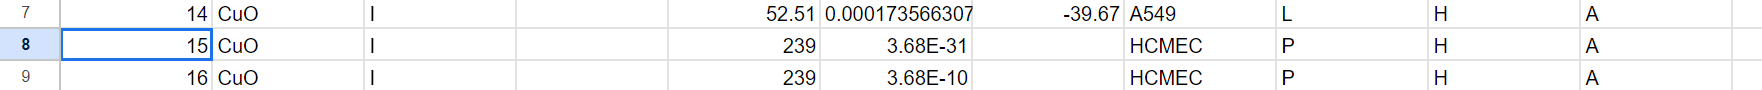

image_2023-06-29_00-40-59.png